Columns in the dataset: ['product_id', 'product_name', 'gender', 'category', 'pattern', 'color', 'age_group', 'season', 'price', 'material', 'sales_count', 'reviews_count', 'average_rating', 'out_of_stock_times', 'brand', 'discount', 'last_stock_date', 'wish_list_count', 'month_of_sale', 'year_of_sale']
Top 10 features: Index(['discount_0.2', 'color_White', 'category_Blouse', 'discount_0.1',
       'category_Jeans', 'season_All', 'product_name_Wool Jacket',
       'out_of_stock_times', 'reviews_count', 'product_id'],
      dtype='object')
Training MSE: 2772.7326380952386, R2: 0.8364501483026314, MAPE: 0.27184828673829775
Testing MSE: 20981.749204040407, R2: -0.12258060376392121, MAPE: 0.8010369392647272


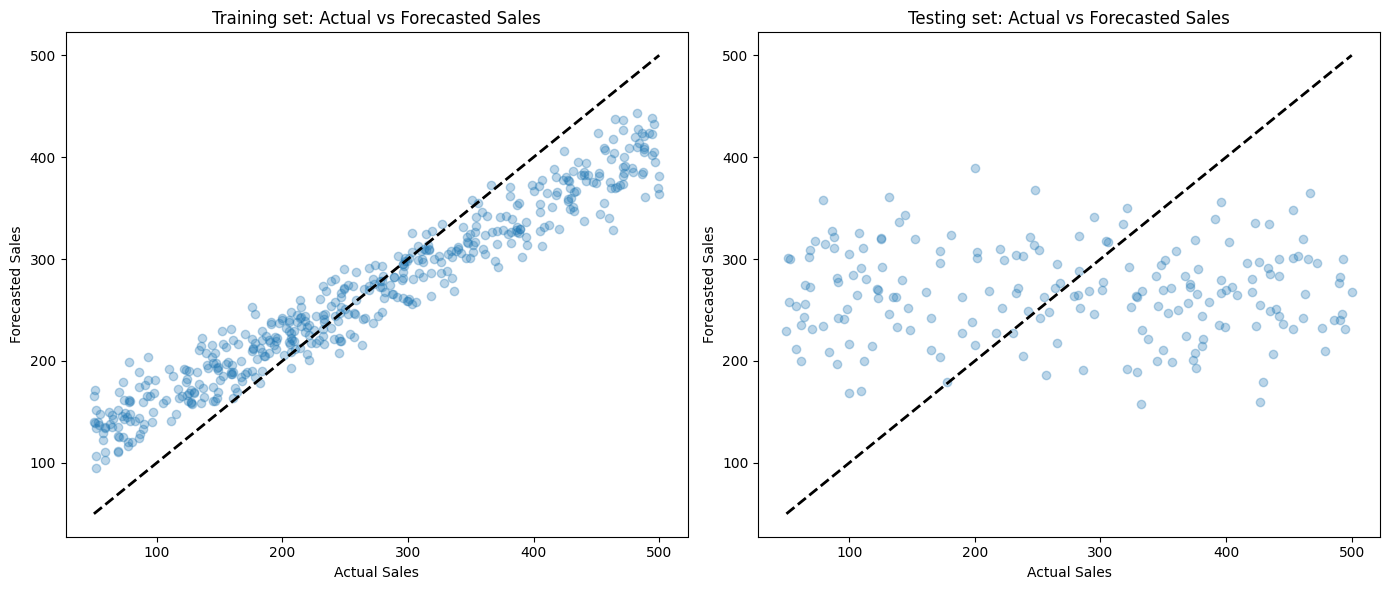

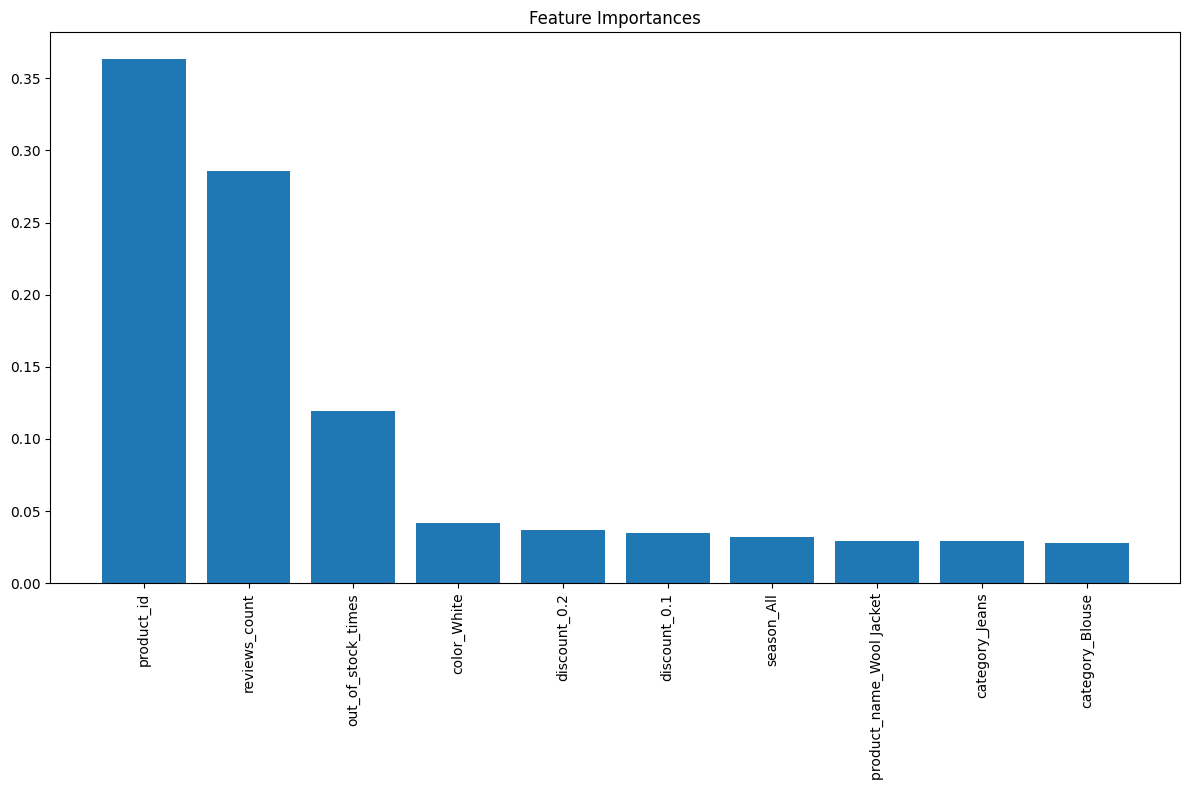

In [7]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

# Ensure the file path is correct and accessible
file_path = 'fashion_data_2018_2022.xlsx'

if not os.path.isfile(file_path):
    print(f"File not found: {file_path}")
else:
    try:
        # Load your dataset
        df = pd.read_excel(file_path)

        # Feature columns
        feature_cols = ['product_name', 'gender', 'category', 'pattern', 'color', 'age_group', 
                        'season', 'price', 'material', 'average_rating', 'brand', 'discount', 
                        'last_stock_date', 'wish_list_count', 'month_of_sale', 'year_of_sale']

        # Print columns in the DataFrame to verify column names
        print("Columns in the dataset:", df.columns.tolist())

        # Check if all feature columns exist in the DataFrame
        missing_cols = [col for col in feature_cols if col not in df.columns]
        if missing_cols:
            print(f"Missing columns: {missing_cols}")
            # Remove missing columns from feature_cols
            feature_cols = [col for col in feature_cols if col in df.columns]

        # Convert categorical columns to numerical using one-hot encoding
        df = pd.get_dummies(df, columns=feature_cols)

        # Target column
        target_col = 'sales_count'

        # Split the data into features and target
        X = df.drop(columns=[target_col])
        y = df[target_col]

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Create the initial Random Forest Regressor model
        initial_model = RandomForestRegressor(n_estimators=100, random_state=42)

        # Train the initial model
        initial_model.fit(X_train, y_train)

        # Get feature importances from the initial model
        feature_importances = initial_model.feature_importances_
        features = X.columns

        # Select the top N features based on their importance
        N = 10  # Adjust this number based on your preference
        top_indices = np.argsort(feature_importances)[-N:]
        top_features = features[top_indices]

        print(f"Top {N} features: {top_features}")

        # Use only the top N features for training the final model
        X_train_top = X_train[top_features]
        X_test_top = X_test[top_features]

        # Create the final Random Forest Regressor model
        model = RandomForestRegressor(n_estimators=100, random_state=42)

        # Train the model
        model.fit(X_train_top, y_train)

        # Predict on the training set
        y_train_pred = model.predict(X_train_top)

        # Predict on the testing set
        y_test_pred = model.predict(X_test_top)

        # Evaluate the model
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
        test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

        print(f'Training MSE: {train_mse}, R2: {train_r2}, MAPE: {train_mape}')
        print(f'Testing MSE: {test_mse}, R2: {test_r2}, MAPE: {test_mape}')

        # Plotting actual vs forecasted sales for training set
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        plt.scatter(y_train, y_train_pred, alpha=0.3)
        plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
        plt.xlabel('Actual Sales')
        plt.ylabel('Forecasted Sales')
        plt.title('Training set: Actual vs Forecasted Sales')

        # Plotting actual vs forecasted sales for testing set
        plt.subplot(1, 2, 2)
        plt.scatter(y_test, y_test_pred, alpha=0.3)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.xlabel('Actual Sales')
        plt.ylabel('Forecasted Sales')
        plt.title('Testing set: Actual vs Forecasted Sales')

        plt.tight_layout()
        plt.show()

        # Plotting feature importance
        feature_importances = model.feature_importances_
        features = top_features
        indices = feature_importances.argsort()[::-1]

        plt.figure(figsize=(12, 8))
        plt.title("Feature Importances")
        plt.bar(range(len(indices)), feature_importances[indices], align='center')
        plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()
    except PermissionError:
        print(f"Permission denied: '{file_path}'. Please check the file permissions.")
    except Exception as e:
        print(f"An error occurred: {e}")
